# LAB 3 MOS: Newton Raphson y Gradiente Descendente

- Samuel Augusto Hernandez 202213772
- Tomas Alberto Rodriguez 2022128686

## Problema 1: Newton-Raphson en 2D para Polinomios Cúbicos

$$ f(x) = 3 \cdot x^3 - 10 \cdot x^2 - 56 \cdot x +50 $$

$$ f'(x) = 9 \cdot x^2 - 20 \cdot x - 56 $$

$$ f''(x) = 18 \cdot x - 20 $$

### Implementación algoritmo Newton-Raphson (1 dimensión)


+------+---------+--------+---------------+
|   x0 |   alpha |   raiz | tipo          |
+======+=========+========+===============+
|   -6 |     0.6 |  -1.62 | Máximo local. |
+------+---------+--------+---------------+
|   -6 |     1   |  -1.62 | Máximo local. |
+------+---------+--------+---------------+
|   -4 |     0.6 |  -1.62 | Máximo local. |
+------+---------+--------+---------------+
|   -4 |     1   |  -1.62 | Máximo local. |
+------+---------+--------+---------------+
|   -2 |     0.6 |  -1.62 | Máximo local. |
+------+---------+--------+---------------+
|   -2 |     1   |  -1.62 | Máximo local. |
+------+---------+--------+---------------+
|    0 |     0.6 |  -1.62 | Máximo local. |
+------+---------+--------+---------------+
|    0 |     1   |  -1.62 | Máximo local. |
+------+---------+--------+---------------+
|    2 |     0.6 |   3.84 | Mínimo local. |
+------+---------+--------+---------------+
|    2 |     1   |   3.84 | Mínimo local. |
+------+---------+--------+-----

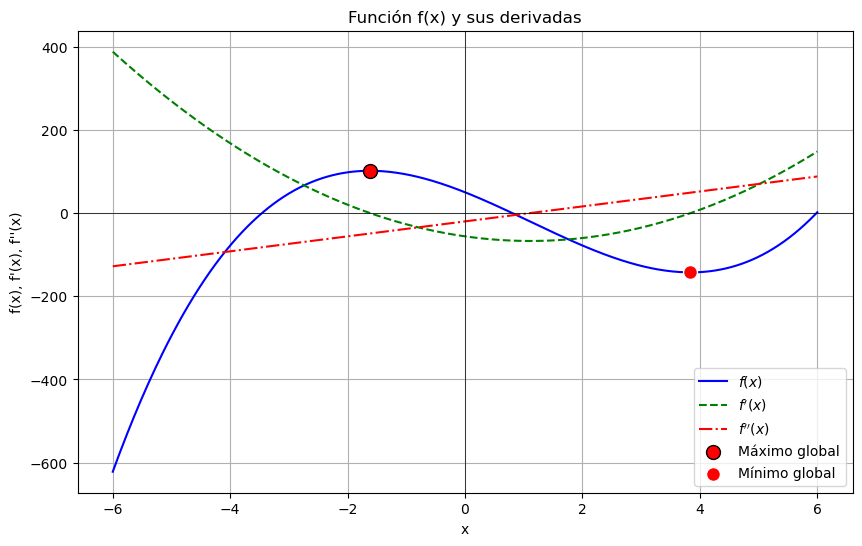

+-------+----------+
|     X |        Y |
+=======+==========+
| -1.62 |  101.721 |
+-------+----------+
|  3.84 | -142.627 |
+-------+----------+


In [74]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

x = sp.symbols('x')
a = 3
b = 10
c = 56
d = 50
# Función de tercer grado
f = a*x**3 - b*x**2 - c*x + d

# f'(x) Derivada
f_prima = sp.diff(f,x)
# f''(x) Segunda derivada
f_doble_prima = sp.diff(f_prima, x)

# Funciones numericas
f_func = sp.lambdify(x, f, 'numpy')
f_derivada = sp.lambdify(x, f_prima, 'numpy')
f_segunda_derivada = sp.lambdify(x, f_doble_prima, 'numpy')

# Algoritmo de Newton-Raphson
def newton_raphson(f_prime_func, f_double_prime_func, x0, alpha=1.0, tol=1e-6, max_iter=100):
    x_k = x0
    # Iteraciones con un maximo
    for k in range(max_iter):
        # Calcular gradiente
        grad_f = f_prime_func(x_k)
        # Calcular hessiana
        hess_f = f_double_prime_func(x_k) # Como es una dimension es la segunda derivada
        
        # Verificar si la segunda derivada es cercana a cero
        if abs(hess_f) < 1e-12:
            print(f"La Hessiana es muy pequeña o cero, el método falla en x0 = {x_k}")
            return None
        
        # Calcular dk
        d_k = -grad_f / hess_f
        
        # Actualizar x_k
        x_k = x_k + alpha * d_k
        
        # Verificar la condición de parada
        if abs(grad_f) < tol:
            return x_k
    
    print("Se alcanzó el número máximo de iteraciones.")
    return x_k

def caracterizacion_extremo(f_double_prime_func, x_k):
    # Evaluar la segunda derivada en el punto
    f_double_prime_at_root = f_double_prime_func(x_k)
    
    # Signo de segunda derivada
    if f_double_prime_at_root > 0:
        return "Mínimo local."
    elif f_double_prime_at_root < 0:
        return "Máximo local."
    else:
        return "Punto silla"

# Graficar la función, sus derivadas y los puntos
def graficar_funcion(f_func, f_derivada, f_segunda_derivada, puntos_encontrados, rango):
    x_vals = np.linspace(-rango, rango, 400)
    # Valores de función, derivada y segunda derivada
    f_vals = f_func(x_vals)
    f_prime_vals = f_derivada(x_vals)
    f_double_prime_vals = f_segunda_derivada(x_vals)
    
    # Máximos y mínimos globales
    valores_funcion = [f_func(p) for p in puntos_encontrados]
    max_global = max(valores_funcion)
    min_global = min(valores_funcion)
    
    # Puntos
    max_punto = puntos_encontrados[valores_funcion.index(max_global)]
    min_punto = puntos_encontrados[valores_funcion.index(min_global)]

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, f_vals, label='$f(x)$', color='blue')
    plt.plot(x_vals, f_prime_vals, label="$f'(x)$", linestyle='--', color='green')
    plt.plot(x_vals, f_double_prime_vals, label="$f''(x)$", linestyle='-.', color='red')
    
    # Añadir los puntos encontrados a la gráfica
    for p in puntos_encontrados:
        if p == max_punto:
            plt.scatter(p, f_func(p), color='red', zorder=5, label='Máximo global', s=100, edgecolor='black')
        elif p == min_punto:
            plt.scatter(p, f_func(p), color='red', zorder=5, label='Mínimo global', s=100, edgecolor='white')
        else:
            plt.scatter(p, f_func(p), color='black', zorder=5, label='Extremos locales', s=100, edgecolor='black')
    
    plt.title("Función f(x) y sus derivadas")
    plt.xlabel('x')
    plt.ylabel('f(x), f\'(x), f\'\'(x)')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.grid(True)
    plt.show()



def analizar_convergencia_y_graficar(f_func, f_derivada, f_segunda_derivada, valores_iniciales, valores_alpha, rango):
    puntos_encontrados = []
    convergencia = []
    headers = ["x0", "alpha", "raiz", "tipo"]
    
    # Experimentar con diferentes valores iniciales
    for x0 in valores_iniciales:
        for alpha in valores_alpha:
            x_k = newton_raphson(f_derivada, f_segunda_derivada, x0, alpha=alpha)
            if x_k is not None:
                tipo = caracterizacion_extremo(f_segunda_derivada, x_k)
                row = [x0, alpha, round(x_k, 2), tipo]
                convergencia.append(row)
                if round(x_k, 2) not in puntos_encontrados:
                    x_k = round(x_k, 2)
                    puntos_encontrados.append(x_k)

    # Imprimir resultados de la convergencia
    print(tabulate(convergencia, headers=headers, tablefmt="grid"))

    # Graficar la función con los puntos encontrados
    graficar_funcion(f_func, f_derivada, f_segunda_derivada, puntos_encontrados, rango)

    # Imprimir tabla con los puntos encontrados y sus valores
    table_data = []
    for p in puntos_encontrados:
        table_data.append([p, f_func(p)])

    headers = ["X", "Y"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))




analizar_convergencia_y_graficar(f_func, f_derivada, f_segunda_derivada, [-6, -4, -2, 0, 2, 4, 6], [0.6, 1.0], 6)


### Analisis de comportamiento de convergencia

En este caso, se realizaron múltiples ejecuciones del algoritmo de Newton-Raphson con diferentes valores iniciales X_0 dentro del intervalo [-6, 6] y diferentes valores para alpha (0.6 y 1.0). La raíz encontrada en cada ejecución es consistente en los valores de X_0 y alpha, lo que sugiere que el algoritmo ha convergido correctamente en cada caso. 

Los puntos iniciales más cercanos a los puntos críticos de la función f(x) (es decir, los máximos y mínimos locales) convergen a esos puntos. 

- Para valores iniciales entre -6 y 0, la raíz encontrada se aproxima al maximo local -1,62
- Para valores iniciales entre 2 y 6, la raíz encontrada se aproxima al mínimo local 3,84

## Problema 2: Análisis de Extremos Locales y Globales

$$ f(x) = x^5 - 8 \cdot x^3 - 10 \cdot x + 6 $$

$$ f'(x) = 5 \cdot x^4 - 24 \cdot x^2 - 10 $$

$$ f''(x) = 20 \cdot x^3 - 48 \cdot x $$

La Hessiana es muy pequeña o cero, el método falla en x0 = 0
+------+---------+--------+---------------+
|   x0 |   alpha |   raiz | tipo          |
+======+=========+========+===============+
|   -3 |     0.6 |  -2.08 | Máximo local. |
+------+---------+--------+---------------+
|   -2 |     0.6 |  -2.08 | Máximo local. |
+------+---------+--------+---------------+
|   -1 |     0.6 |  -0.68 | Mínimo local. |
+------+---------+--------+---------------+
|    1 |     0.6 |   0.68 | Máximo local. |
+------+---------+--------+---------------+
|    2 |     0.6 |   2.08 | Mínimo local. |
+------+---------+--------+---------------+
|    3 |     0.6 |   2.08 | Mínimo local. |
+------+---------+--------+---------------+


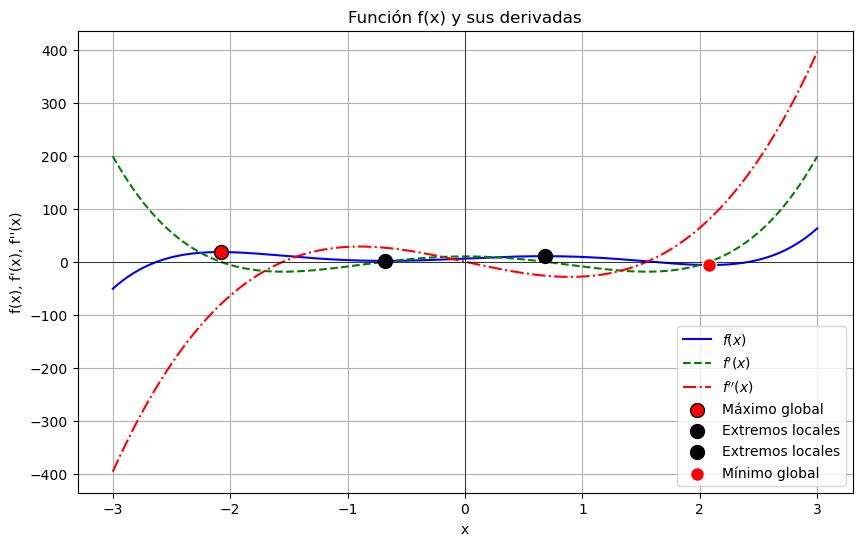

+-------+----------+
|     X |        Y |
+=======+==========+
| -2.08 | 18.2584  |
+-------+----------+
| -0.68 |  1.57006 |
+-------+----------+
|  0.68 | 10.4299  |
+-------+----------+
|  2.08 | -6.2584  |
+-------+----------+


In [75]:
x = sp.symbols('x')
a = 1
b = 0
c = -8
d = 0
e = 10
g = 6
# Función de tercer grado
f2 = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + g

# f'(x) Derivada
f_prima = sp.diff(f2,x)
# f''(x) Segunda derivada
f_doble_prima = sp.diff(f_prima, x)

# Funciones numericas
f_func = sp.lambdify(x, f2, 'numpy')
f_derivada = sp.lambdify(x, f_prima, 'numpy')
f_segunda_derivada = sp.lambdify(x, f_doble_prima, 'numpy')

analizar_convergencia_y_graficar(f_func, f_derivada, f_segunda_derivada, [-3, -2, -1, 0, 1, 2, 3], [0.6], 3)

### Analisis de comportamiento de convergencia

En este caso, se realizaron múltiples ejecuciones del algoritmo de Newton-Raphson con diferentes valores iniciales X_0 dentro del intervalo [-3, 3] y alpha = 0.6. La raíz encontrada en cada ejecución es consistente en los valores de X_0 y alpha, lo que sugiere que el algoritmo ha convergido correctamente en cada caso. 

Los puntos iniciales más cercanos a los puntos críticos de la función f(x) (es decir, los máximos y mínimos locales) convergen a esos puntos. 

- Para valores iniciales -3 y -2, la raíz encontrada se aproxima al maximo local en -2.08
- Para el valor inicial -1, la raíz encontrada se aproxima al mínimo local en -0.68
- Para el valor inicial 1, la raíz encontrada se aproxima al mínimo local en 0.68
- Para valores iniciales 3 y 2, la raíz encontrada se aproxima al maximo local en 2.08

el método ha fallado en 
$$x_0=0$$
lo cual se debe a que la segunda derivada es cero en ese punto

## Problema 3: Newton-Raphson Multidimensional

### Parte a: Función de Rosenbrock (3D)

$$ f(x, y) = (x - 1)^2 + 100 (y - x^2)^2 $$

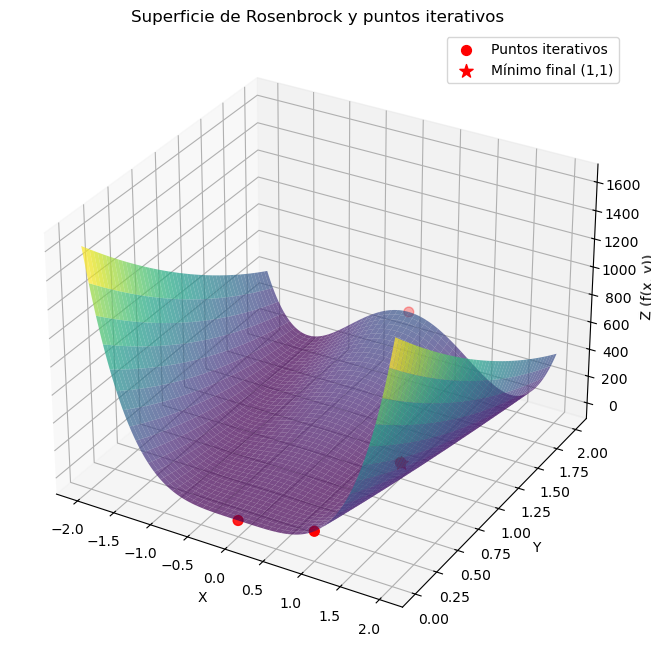

In [76]:
from mpl_toolkits.mplot3d import Axes3D

# Función de Rosenbrock
def f(x, y):
    return (x - 1)**2 + 100 * (y - x**2)**2

# Gradiente de la función de Rosenbrock
def grad_f(x, y):
    df_dx = 2*(x - 1) - 400*x*(y - x**2)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

# Matriz Hessiana de la función de Rosenbrock
def hessian_f(x, y):
    d2f_dx2 = 2 - 400*(y - x**2) + 800*x**2
    d2f_dxdy = -400*x
    d2f_dydx = -400*x
    d2f_dy2 = 200
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dydx, d2f_dy2]])

# Método de Newton-Raphson para funciones bidimensionales
def newton_raphson_2d(grad_f, hessian_f, x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    points = [(x, y)]  # Para almacenar los puntos iterativos
    for _ in range(max_iter):
        grad = grad_f(x, y)
        H = hessian_f(x, y)
        
        # Resolver el sistema H * delta = grad
        delta = np.linalg.solve(H, grad)
        
        # Actualización de x, y
        x, y = np.array([x, y]) - delta
        points.append((x, y))
        
        # Condición de parada
        if np.linalg.norm(grad) < tol:
            break
    return np.array(points)

# Graficar la superficie y los puntos iterativos
def plot_surface_and_iterations():
    # Rango de x, y para la superficie
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(0, 2, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)

    # Graficar la superficie 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    # Inicialización del punto (x0, y0) = (0, 10)
    x0, y0 = 0, 10
    points = newton_raphson_2d(grad_f, hessian_f, x0, y0)

    # Extraer las coordenadas x, y de los puntos
    x_iter = points[:, 0]
    y_iter = points[:, 1]
    z_iter = f(x_iter, y_iter)

    # Verificar que los puntos iterativos están dentro de un rango razonable
    x_iter = np.clip(x_iter, -2, 2)
    y_iter = np.clip(y_iter, 0, 2)
    z_iter = f(x_iter, y_iter)

    # Graficar los puntos iterativos
    ax.scatter(x_iter, y_iter, z_iter, color='r', label='Puntos iterativos', s=50)

    # Destacar el mínimo final
    ax.scatter(1, 1, f(1, 1), color='r', label='Mínimo final (1,1)', s=100, marker='*')

    # Etiquetas
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (f(x, y))')
    ax.set_title('Superficie de Rosenbrock y puntos iterativos')
    ax.legend()

    # Mostrar el gráfico
    plt.show()

# Llamar a la función de graficado
plot_surface_and_iterations()

### Parte b: Función en 4D

$$ f(x, y, z) = (x - 1)^2 + (y - 2)^2 + (z - 3)^2 $$

## Problema 4: Gradiente Descendente en Optimización

## Problema 5: Descenso de Gradiente y Descenso de Gradiente Basado en Momento